It's necessary do upload the folder "images" to be able to run the code correctly.

In [60]:
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io as skio


import skimage.morphology as morpho
import skimage.feature as skf
from scipy import ndimage as ndi


In [61]:
def viewimage(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI et MAXI seront mis a 0 et 255 dans l'image resultat

    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase=' '
    elif platform.system()=='Linux': #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase= ' &'
    elif platform.system()=='Windows':
        prephrase='start /B "D:/GIMP/bin/gimp-2.10.exe" -a '#Remplacer D:/... par le chemin de votre GIMP
        endphrase= ''
    else:
        print('Systeme non pris en charge par l affichage GIMP')
        return 'erreur d afficahge'
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M

    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1

    nomfichier=tempfile.mktemp('images/TPIMA.png')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)


In [62]:
def viewimage_color(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI(defaut 0) et MAXI (defaut 255) seront mis a 0 et 255 dans l'image resultat

    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase=' '
    elif platform.system()=='Linux': #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase= ' &'
    elif platform.system()=='Windows':
        prephrase='start /B "D:/GIMP/bin/gimp-2.10.exe" -a '#Remplacer D:/... par le chemin de votre GIMP
        endphrase= ''
    else:
        print('Systeme non pris en charge par l affichage GIMP')
        return 'erreur d afficahge'

    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M
    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1

    nomfichier=tempfile.mktemp('images\TPIMA.pgm')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)


In [63]:
def strel(forme,taille,angle=45):
    """renvoie un element structurant de forme
     'diamond'  boule de la norme 1 fermee de rayon taille
     'disk'     boule de la norme 2 fermee de rayon taille
     'square'   carre de cote taille (il vaut mieux utiliser taille=impair)
     'line'     segment de langueur taille et d'orientation angle (entre 0 et 180 en degres)
      (Cette fonction n'est pas standard dans python)
    """

    if forme == 'diamond':
        return morpho.selem.diamond(taille)
    if forme == 'disk':
        return morpho.selem.disk(taille)
    if forme == 'square':
        return morpho.selem.square(taille)
    if forme == 'line':
        angle=int(-np.round(angle))
        angle=angle%180
        angle=np.float32(angle)/180.0*np.pi
        x=int(np.round(np.cos(angle)*taille))
        y=int(np.round(np.sin(angle)*taille))
        if x**2+y**2 == 0:
            if abs(np.cos(angle))>abs(np.sin(angle)):
                x=int(np.sign(np.cos(angle)))
                y=0
            else:
                y=int(np.sign(np.sin(angle)))
                x=0
        rr,cc=morpho.selem.draw.line(0,0,y,x)
        rr=rr-rr.min()
        cc=cc-cc.min()
        img=np.zeros((rr.max()+1,cc.max()+1) )
        img[rr,cc]=1
        return img
    raise RuntimeError('Erreur dans fonction strel: forme incomprise')


In [64]:
def couleurs_alea(im):
    """
    Donne des couleurs aleatoires a une image en niveau de gris.
    Cette fonction est utile lorsque le niveua de gris d'interprete comme un numero
      de region. Ou encore pour voir les leger degrades d'une teinte de gris.
      """
    sh=im.shape
    out=np.zeros((sh[0],sh[1],3),dtype=np.uint8)
    nbcoul=np.int32(im.max())
    tabcoul=np.random.randint(0,256,size=(nbcoul+1,3))
    tabcoul[0,:]=0
    for k in range(sh[0]):
        for l in range(sh[1]):
            out[k,l,:]=tabcoul[im[k,l]]
    return out

In [65]:
def gris_depuis_couleur(im):
    """ Transforme une image couleur en image a niveaux de gris"""
    return im[:,:,:3].sum(axis=2)/3


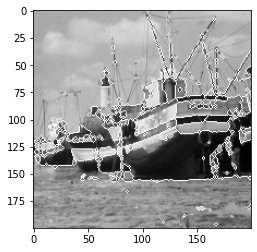

In [ ]:
#Do not run, it's the code that you provide us 
# Binary images
#im=skio.imread('cellbin.bmp')
#im=skio.imread('cafe.bmp')

# Gray-scale images
im=skio.imread('images/retina2.gif')
#im=skio.imread('bat200.bmp')
#im=skio.imread('bulles.bmp')
#im=gris_depuis_couleur (skio.imread('cailloux.png'))
#im=gris_depuis_couleur(skio.imread('cailloux2.png'))
#im=skio.imread('laiton.bmp')

plt.imshow(im,cmap="gray")
# viewimage(im) - Utilisable à la place de plt.imshow si Gimp est installé.

se=strel('disk',4)
se1=strel('square',3)
se2=strel('line',5,45)

'''
# dilation
dil=morpho.dilation(im,se)
plt.imshow(dil,cmap="gray")
plt.title('Dilation Disk')  
plt.show()
dil=morpho.dilation(im,se1)
plt.imshow(dil,cmap="gray")
plt.title('Dilation Square')  
plt.show()
dil=morpho.dilation(im,se2)
plt.imshow(dil,cmap="gray")
plt.title('Dilation Line')  
plt.show()

# erosion
ero=morpho.erosion(im,se)
plt.imshow(ero,cmap="gray")
plt.title('Erosion Disk')  
plt.show()
ero=morpho.erosion(im,se1)
plt.imshow(ero,cmap="gray")
plt.title('Erosion Square')  
plt.show()
ero=morpho.erosion(im,se2)
plt.imshow(ero,cmap="gray")
plt.title('Erosion Line')  
plt.show()

#opening
open=morpho.opening(im,se)
plt.imshow(open,cmap="gray")
plt.title('Opening Disk')  
plt.show()
open=morpho.opening(im,se1)
plt.imshow(open,cmap="gray")
plt.title('Opening Square')  
plt.show()
open=morpho.opening(im,se2)
plt.imshow(open,cmap="gray")
plt.title('Opening Line')  
plt.show()

#closing
close=morpho.closing(im,se)
plt.imshow(close,cmap="gray")
plt.title('Closing Disk')  
plt.show()
close=morpho.closing(im,se1)
plt.imshow(close,cmap="gray")
plt.title('Closing Square')  
plt.show()
close=morpho.closing(im,se2)
plt.imshow(close,cmap="gray")
plt.title('Closing Line')  
plt.show()
'''
#%% Top-hat transforme
im=skio.imread('images/retina2.gif')
t=10
se=strel('line',t,-45)
ch=im-morpho.opening(im,se)
plt.imshow(ch,cmap="gray")

#%%  Alternate sequential filter
im=skio.imread('images/retina2.gif')
imt=im.copy()
N=3
for k in range(N):
    se=strel('disk',k)
    imt=morpho.closing(morpho.opening(imt,se),se)
plt.imshow(imt,cmap="gray")



#%% Watersheds
im=skio.imread('images/bat200.bmp')
se=morpho.selem.disk(1)

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
plt.imshow(grad,cmap="gray")

local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...
                            indices=False)
markers = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")

labels = morpho.watershed(grad, markers,watershed_line=True)
plt.imshow(couleurs_alea(labels))
# viewimage_color(couleurs_alea(labels)) - Utilisable si gimp est installé

# visualization of the result
segm=labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i,j] == 0:
            segm[i,j]=255
        else:
            segm[i,j]=0
#superimposition of segmentation contours on the original image
contourSup=np.maximum(segm,im)
plt.imshow(contourSup,cmap="gray")


#%% reconstruction
im=skio.imread('images/retina2.gif')
se4=strel('disk',4)
open4=morpho.opening(im,se4)
reco=morpho.reconstruction(open4,im)
plt.imshow(reco,cmap="gray")
#%% FIN  exemples TP MORPHO




# **Mathematical morphology on gray-scale images**

**Question**

* 1) Apply dilation, erosion, opening and closing with various structuring elements, by varying
the shape and the size (functions morpho.dilation, morpho.erosion, morpho.opening,
morpho.closing.
What is the influence of the size and the shape of the structuring element?

**Answer** 

* 1) The shape of the structuring element has a great influence on the morphological operation, for example if we take a structuring element with a large size, the shape of the element starts to appear in the image and the more the size of the structuring element it's increased, the more visible it will be in the image, and this is due to the propagation of the grey level in relation to the element. 

  Moreover the use of different shapes for the structuring element highlight different objects in the image. So in the case we have to work with round object in (a cellulas for examples), we will use a disk, if we want to highlight roads in a remote sensing image we will work with lines as structuring element.

  Moreover, the bigger the structuring element is, the more we will start to see it inside the filtered image as shown in the filtering with structuring element of dimension 10(done for each type of filtering)! 

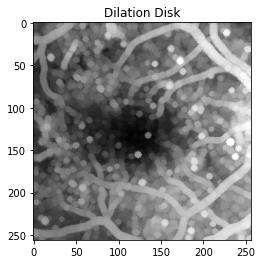

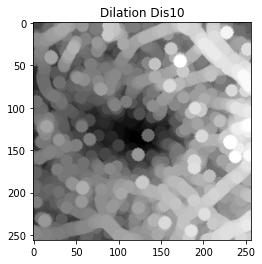

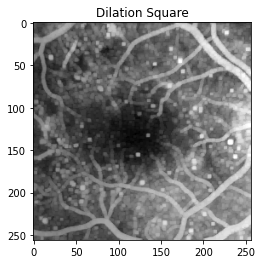

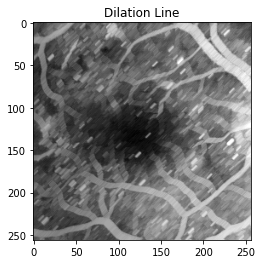

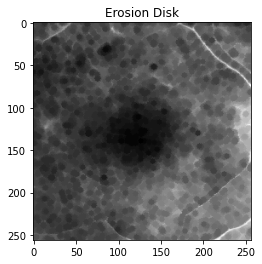

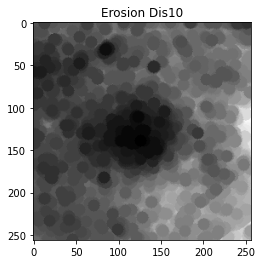

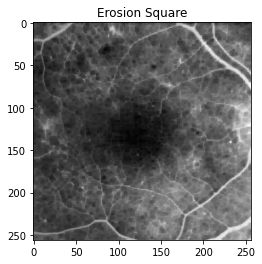

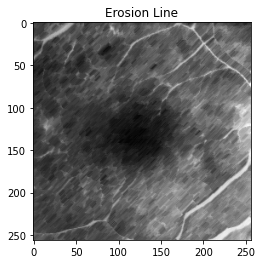

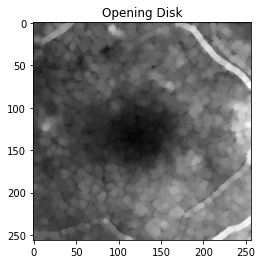

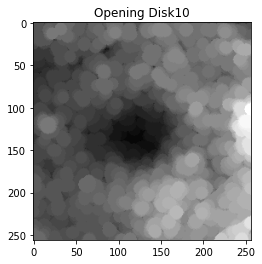

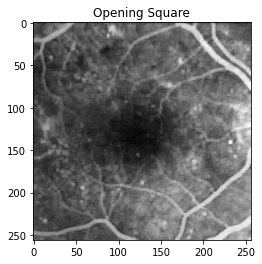

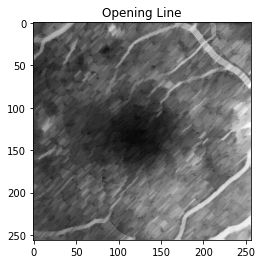

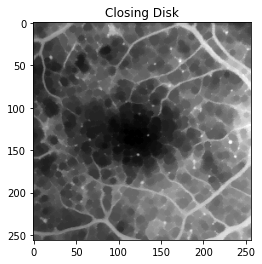

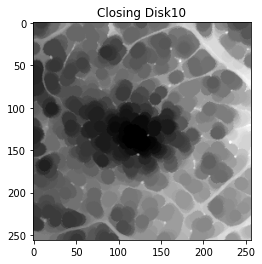

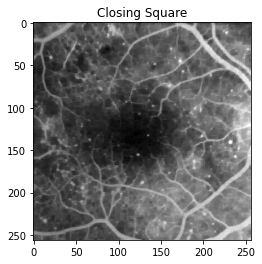

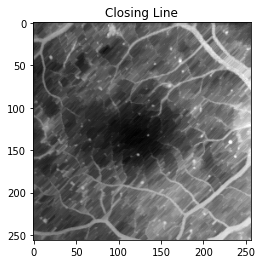

In [66]:
sed=strel('disk',3)
sedb=strel('disk',7)
ses=strel('square',3)
sel=strel('line',5,45)
im=skio.imread('images/retina2.gif')

# dilation
dil=morpho.dilation(im,sed)
plt.imshow(dil,cmap="gray")
plt.title('Dilation Disk')  
plt.show()

dil1=morpho.dilation(im,sedb)
plt.imshow(dil1,cmap="gray")
plt.title('Dilation Dis10')  
plt.show()

dil=morpho.dilation(im,ses)
plt.imshow(dil,cmap="gray")
plt.title('Dilation Square')  
plt.show()

dil=morpho.dilation(im,sel)
plt.imshow(dil,cmap="gray")
plt.title('Dilation Line')  
plt.show()

# erosion
ero=morpho.erosion(im,sed)
plt.imshow(ero,cmap="gray")
plt.title('Erosion Disk')  
plt.show()

ero1=morpho.erosion(im,sedb)
plt.imshow(ero1,cmap="gray")
plt.title('Erosion Dis10')  
plt.show()

ero=morpho.erosion(im,ses)
plt.imshow(ero,cmap="gray")
plt.title('Erosion Square')  
plt.show()

ero=morpho.erosion(im,sel)
plt.imshow(ero,cmap="gray")
plt.title('Erosion Line')  
plt.show()

#opening
open=morpho.opening(im,sed)
plt.imshow(open,cmap="gray")
plt.title('Opening Disk')  
plt.show()

open=morpho.opening(im,sedb)
plt.imshow(open,cmap="gray")
plt.title('Opening Disk10')  
plt.show()

open=morpho.opening(im,ses)
plt.imshow(open,cmap="gray")
plt.title('Opening Square')  
plt.show()

open=morpho.opening(im,sel)
plt.imshow(open,cmap="gray")
plt.title('Opening Line')  
plt.show()

#closing
close=morpho.closing(im,sed)
plt.imshow(close,cmap="gray")
plt.title('Closing Disk')  
plt.show()

close=morpho.closing(im,sedb)
plt.imshow(close,cmap="gray")
plt.title('Closing Disk10')  
plt.show()

close=morpho.closing(im,ses)
plt.imshow(close,cmap="gray")
plt.title('Closing Square')  
plt.show()

close=morpho.closing(im,sel)
plt.imshow(close,cmap="gray")
plt.title('Closing Line')  
plt.show()


**Question**

* 2) Illustrate the properties of these four operations on examples.

**Answer** 

* 2a) **Dilation** is: 

     - Estensive : as we can see in the previouse images, the original image is contained in the filtered one.  
     - Increasing :  if we take an object that is contained in another one, we will be able to check that also his dilation will be contained in the dilation of the biggest one. 
     - If we dilate the same image with two structuring element, the first one contained in the second one, the filtered image done with the first one will be contained in the filtered image done with the second one, we can check this property with the images shown previously.
     - The dilation of the union of two objects it's equal to the union of the dilation of the two objects. But the dilation of the intersection of two objects is not equal, but contained in the intersection of the dilation of the two objects.
     - Iterativity Property: if we do a sequential dilation with two different structuring element, it's equal to do a dilation with the sum of the two structuring element, as we can see in the question 3.
* 2b) **Erosion** is: 
     - For the Duality property, the erosion of an image with a structuring element is equal to the complementation od the dilation done with the same structuring element, but with a complementary image.
     - Anti-Estensive : as we can see in the previouse images, the filtered image is contained in the original one.  
     - Increasing :  if we take an object that is contained in another one, we will be able to check that also his erosion will be contained in the erosion of the biggest one. 
     - If we erode the same image with two structuring element, the first one contained in the second one, the filtered image done with the first one will containe the filtered image done with the second structuring element, we can check this property with the images shown previously.
     - The erosion of the intersection of two objects it's equal to the intersection of the erosion of the two objects. But the erosion of the union of two objects is not equal, but containe the union of the erosion of the two objects.
     - Iterativity Property: if we do a sequential erosion with two different structuring element, it's equal to do an erosion with the sum of the two structuring element.
* 2c) **Opening** is: 

     - Anti-Estensive : as we can see in the previouse images, the filtered image is contained in the original one.  
     - Increasing :  if we take an object that is contained in another one, we will be able to check that also his opening will be contained in the opening of the biggest one. 
     - Idempotent : Am opening done twice with the same structuring element is equal to the same opening done with the same structuring element just once . 
     - If we open the same image with two structuring element, the first one contained in the second one, the filtered image done with the first one will containe the filtered image done with the second structuring element, we can check this property with the images shown previously.
     - If we do the opening in sequence with two different structuring element , the result will be equal to the opening done with the biggest structuring element between the two. 

* 2d) **Closing** is: 

     - Estensive : as we can see in the previouse images, the filtered image containe the original one.  
     - Increasing :  if we take an object that is contained in another one, we will be able to check that also his closing will be contained in the closing of the biggest one. 
     - Idempotent : A closing done twice with the same structuring element is equal to the same closing done with the same structuring element just once. 
     - If we close the same image with two structuring element, the first one contained in the second one, the filtered image done with the first one will be contained in the filtered image done with the second structuring element, we can check this property with the images shown previously.
     - If we do the closing in sequence with two different structuring element , the result will be equal to the closing done with the biggest structuring element between the two. 
     - The closing of an image with a structuring element is equal to the complement of the closing of the complement image with the same strcutural element.




**Questions**

* 3a)What is the operation equivalent to the succession of a dilation by a square of size 3×3 and
a dilation by a square of size 5 × 5? 
* 3b) Same question for opening. What are the properties
of these operations that explain the result?

**Answers**

* 3a)The operation equivalent to the succession of a dilation by a square of size 3×3 and a dilation by asquare of size 5×5 is a dilation with a square of size 8x8, this because of the iterativity property: a succession of different dilation it’s equal to the application of a dilation with a structuring element of size equal to the sum of the others.

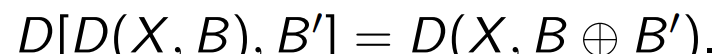
* 3b) The operation equivalent to the succession of an opening by a square of size 3×3 and a dilation by a square of size 5×5 is a dilation with a square of size 5x5. One of the properties of the opening is that: 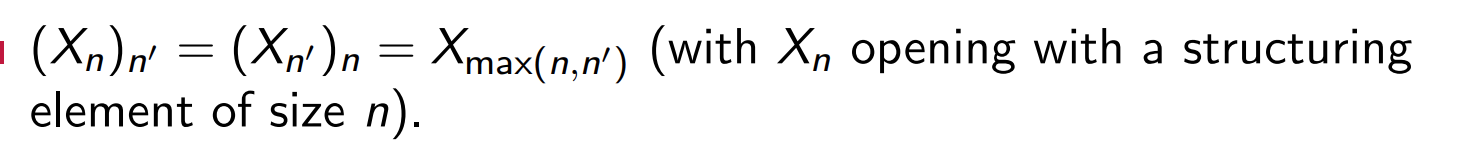

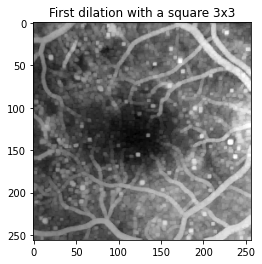

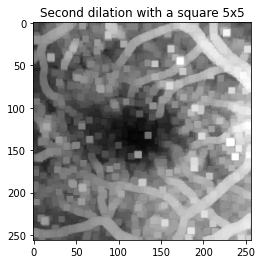

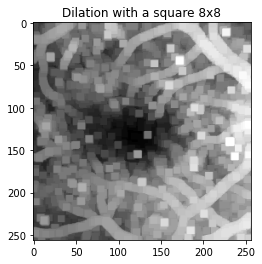

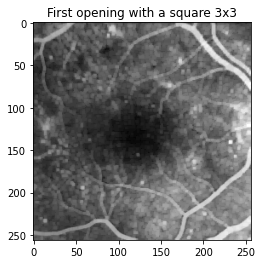

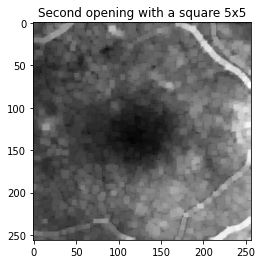

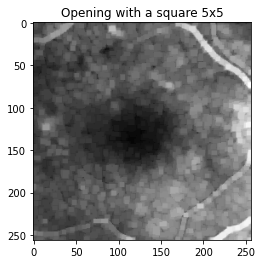

In [67]:
se=strel('square',3)
se1=strel('square',5)
se2=strel('square',8)

dil=morpho.dilation(im,se)
plt.imshow(dil,cmap="gray")
plt.title('First dilation with a square 3x3')  
plt.show()
dil1=morpho.dilation(dil,se1)
plt.imshow(dil1,cmap="gray")
plt.title('Second dilation with a square 5x5')  
plt.show()
dil2=morpho.dilation(im,se2)
plt.imshow(dil2,cmap="gray")
plt.title('Dilation with a square 8x8')  
plt.show()

ope=morpho.opening(im,se)
plt.imshow(ope,cmap="gray")
plt.title('First opening with a square 3x3')  
plt.show()
ope1=morpho.opening(ope,se1)
plt.imshow(ope1,cmap="gray")
plt.title('Second opening with a square 5x5')  
plt.show()
ope2=morpho.opening(im,se1)
plt.imshow(ope2,cmap="gray")
plt.title('Opening with a square 5x5')  
plt.show()

**Question**

* 4a)Apply a top-hat transform (difference of the original image and its opening), for instance on
image retina2.gif. Comment the result, according to the size and shape of the structuring element. 
* 4b)What would be the dual operation (that you can illustrate on image laiton.bmp)?

**Answer**

* 4a) The return of the top-hat transform is an image mainly black with some bright areas. We can observe that all those "elements" in the input image that are "smaller" than the structuringelement (places where the structuring element does not fit in), and are brighter than their surroundingsare highlighted.
* 4b) The dual operator is the top hat done as the difference between the original image andthe closing, thsi time we are going to hihghlite the element "smaller" than the structuring element, anddarker than their surroundings.

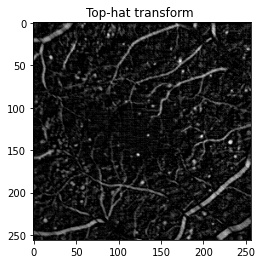

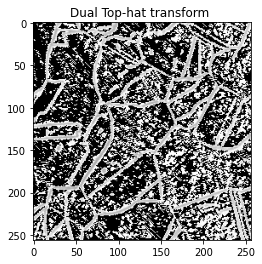

In [68]:
im=skio.imread('images/retina2.gif')
t=10
se=strel('line',t,-45)
ch=im-morpho.opening(im,se)
plt.imshow(ch,cmap="gray")
plt.title('Top-hat transform ')
plt.show()

im2=skio.imread('images/laiton.bmp')
ch2=im2-morpho.closing(im2,se)
plt.imshow(ch2,cmap="gray")
plt.title('Dual Top-hat transform ')
plt.show()

**Question**

* 5) Define segments in several directions, apply an opening with each of them as structuring
element, and compute the point-wise maximum of the results. Conclusion?

**Answer**

* 5) The use of the point-wise maximum of the results makes it possible to reconstruct an image that appears to be well detailed, and all the points in the image that had to be removed from the opening are successfully removed. 

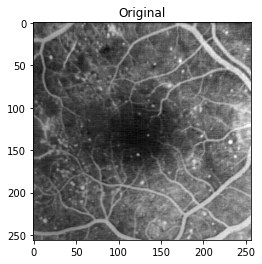

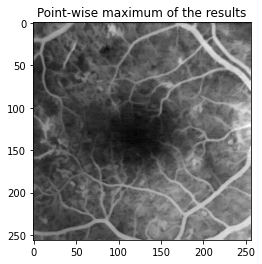

In [69]:
im=skio.imread('images/retina2.gif')
plt.imshow(im,cmap="gray")
plt.title('Original')
plt.show()

se=strel('line',5,30)
se1=strel('line',5,60)
se2=strel('line',5,90)
se3=strel('line',5,120)
se4=strel('line',5,150)
se5=strel('line',5,180)
se6=strel('line',5,210)
se7=strel('line',5,240)
se8=strel('line',5,270)

#opening
open=morpho.opening(im,se)
plt.imshow(open,cmap="gray")
open1=morpho.opening(im,se1)
plt.imshow(open1,cmap="gray")
open2=morpho.opening(im,se2)
plt.imshow(open2,cmap="gray")
open3=morpho.opening(im,se3)
plt.imshow(open3,cmap="gray")
open4=morpho.opening(im,se4)
plt.imshow(open4,cmap="gray")
open5=morpho.opening(im,se5)
plt.imshow(open5,cmap="gray")
open6=morpho.opening(im,se6)
plt.imshow(open6,cmap="gray")
open7=morpho.opening(im,se7)
plt.imshow(open7,cmap="gray")
open8=morpho.opening(im,se8)
plt.imshow(open8,cmap="gray")

max=np.maximum(open,open1)
max=np.maximum(max,open2)
max=np.maximum(max,open3)
max=np.maximum(max,open4)
max=np.maximum(max,open5)
max=np.maximum(max,open6)
max=np.maximum(max,open7)
max=np.maximum(max,open8)
plt.imshow(max,cmap="gray")
plt.title('Point-wise maximum of the results')
plt.show()

# **Alternate sequential filters**



**Questions**

* a) Use different shapes for the structuring element and vary the maximum size. Comment the
results.
* b) What will be obtained if the sequence is continued with larger and larger structuring elements?

**Answers**

* a)Use different shapes for the structuring element and vary the maximum size we can notice that the structuring element is more and more visible in the image
* b)Incresing more and more the size of the structuring element we are going to smooth more and more the final image, there is still be a guarantee of topology preservation.
As we can see in the examples, in the middle of Iteration 2 and Iteration 3 I inserted a gaussian smoothing with sigma=3, the result is close to the intermidiat phase between the the two, even if, using a Alternate sequential filters we are going to see more and more the structuring element during the iteration.
The result strongly depend on the shape of the structuring element, as we can see in the three different examples's final results, although in all of them the result is very similar to smoothing as mentioned above.

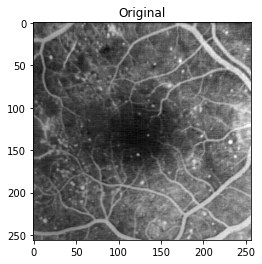

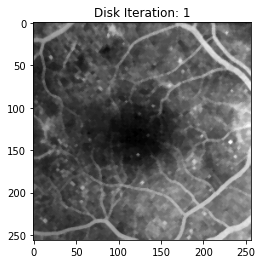

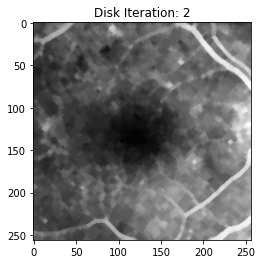

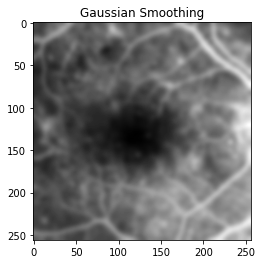

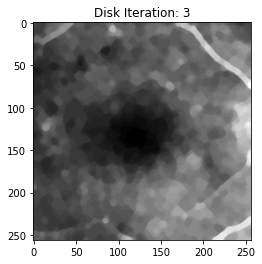

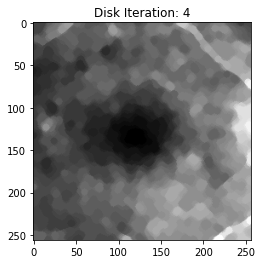

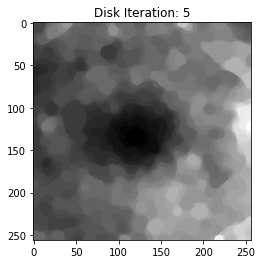

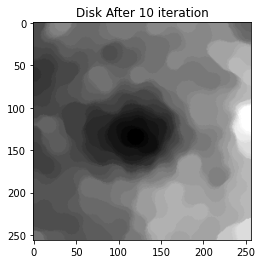

In [71]:
import scipy
im=skio.imread('images/retina2.gif')
plt.imshow(im,cmap="gray")
plt.title('Original')
plt.show()

im1=im.copy()
N=10
for i in range(1,N):
  se=strel('disk',i)
  im1=morpho.closing(morpho.opening(im1,se),se)
  if i<6:
    plt.imshow(im1,cmap="gray")
    plt.title('Disk Iteration: %d' %i)
    plt.show()
  if i==2:
    im2=scipy.ndimage.gaussian_filter(im,3)
    plt.imshow(im2,cmap="gray")
    plt.title('Gaussian Smoothing')
    plt.show()

plt.imshow(im1,cmap="gray")
plt.title('Disk After 10 iteration')
plt.show()

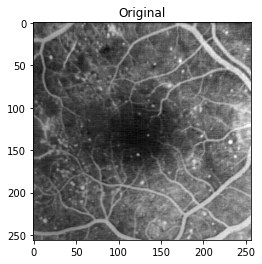

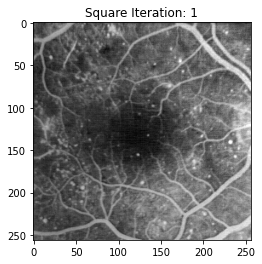

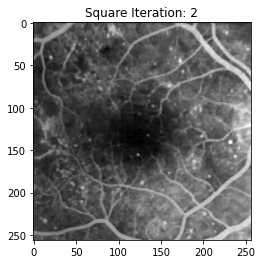

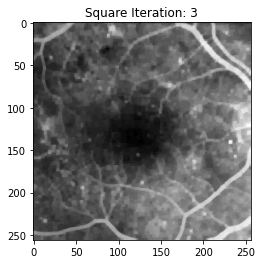

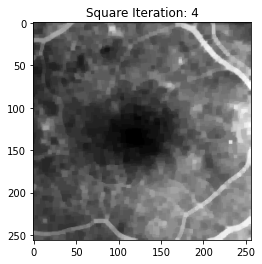

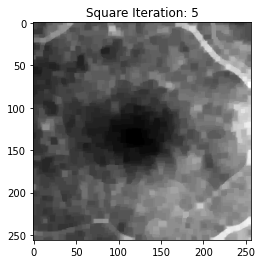

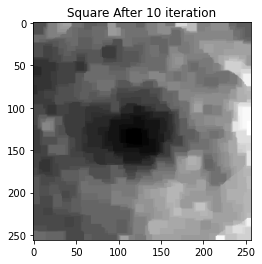

In [72]:
im=skio.imread('images/retina2.gif')
plt.imshow(im,cmap="gray")
plt.title('Original')
plt.show()

im1=im.copy()
N=10
for i in range(1,N):
  se=strel('square',i)
  im1=morpho.closing(morpho.opening(im1,se),se)
  if i<6:
    plt.imshow(im1,cmap="gray")
    plt.title('Square Iteration: %d' %i)
    plt.show()

plt.imshow(im1,cmap="gray")
plt.title('Square After 10 iteration')
plt.show()

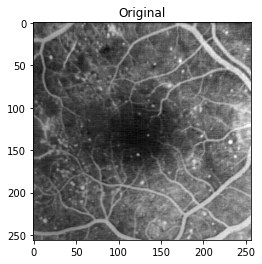

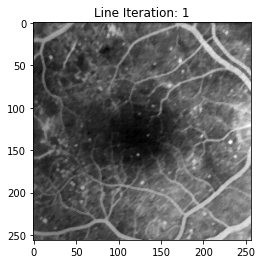

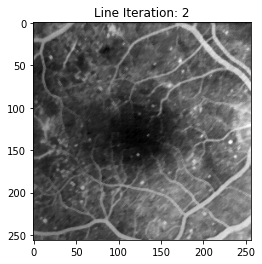

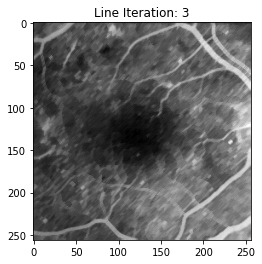

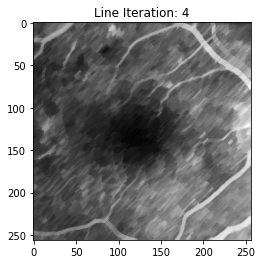

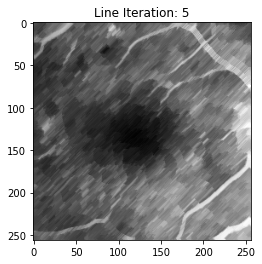

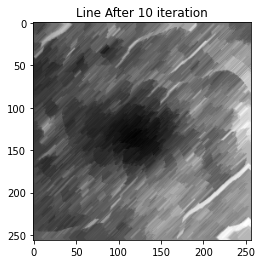

In [73]:
im=skio.imread('images/retina2.gif')
plt.imshow(im,cmap="gray")
plt.title('Original')
plt.show()

im1=im.copy()
N=10
for i in range(1,N):
  se=strel('line',i,45)
  im1=morpho.closing(morpho.opening(im1,se),se)
  if i<6:
    plt.imshow(im1,cmap="gray")
    plt.title('Line Iteration: %d' %i)
    plt.show()

plt.imshow(im1,cmap="gray")
plt.title('Line After 10 iteration')
plt.show()

#**Reconstruction**

**Question**

* 1)As an example, the reconstruction of an image from its opening allow recovering small
details of objects that are partially kept by the opening. Test for example (you can change
the structuring element) and Comment the results: 


```
im=skio.imread(‘retina2.gif’);
se4 = strel(‘disk’,4);
open4 = morpho.opening(im,se4);
reco=morpho.reconstruction(open4,im);
```


**Answer** 

* 1) During the opening all the little elements were eliminated, as we can see there are no more small circles, but the overall image looks very blurred. After the reconstruction, we are able to recover many of the information in the original image, but not the small points. Also some element in the image are more highlighted than in the original one, overall the final result is very similar to the original one.

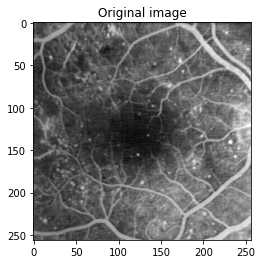

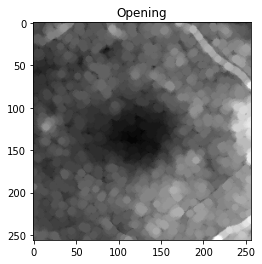

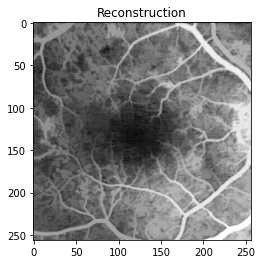

In [74]:
im=skio.imread('images/retina2.gif')
se4 = strel('disk',4);
plt.imshow(im,cmap="gray")
plt.title('Original image')
plt.show()
open4 = morpho.opening(im,se4)
plt.imshow(open4,cmap="gray")
plt.title('Opening')
plt.show()
reco=morpho.reconstruction(open4,im)
plt.imshow(reco,cmap="gray")
plt.title('Reconstruction')
plt.show()

**Question**

* 2) Write the sequence of operators for a reconstruction by erosion. How could this reconstruction be derived from a reconstruction by dilation using duality principle?

**Answer**

* 2) The reconstruction by erosion can be derived from a reconstruction by dilation using duality principle:

     - We invert the initial image with the funcion inv
     - We apply the opnening
     - We reconstructt with the basic method, using the inverse image
     - We invert the final result 

  As we can see in the images, the result is exactly equal to the reconstrucion by erosion of a closing(Reco=Closing Reco)! 
  
  The reconstruction by erosion is similar to the geodesic erosion applied 
until idempotence ( until the resulting image at the iteration i+1 equals the resulting image at iteration i). However, the mask image is used in the reconstruction does not act as a mask but to force the erosion to remain below the mask image. Thus, the mask image must be lower than or equal to the marker image. With reconstruction by erosion, the structuring element is no longer a parameter of the reconstruction. Only the connectivity (4 or 8 in 2D) is used.
The effects are: 
  1.   Removes bright features smaller than the structuring element, without altering the shape.
  2. Reconstructs connected components from the preserved features. 





In [75]:
def inv(img):
  imf=np.zeros((256,256))
  N,M=img.shape
  for i in range(0,N):
    for j in range(0,M):
      imf[i][j]=255-img[i][j]
  return(imf)


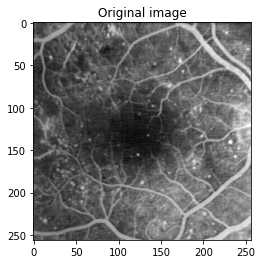

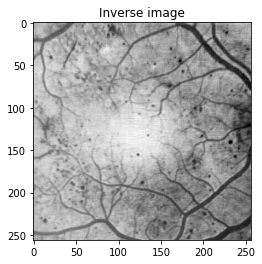

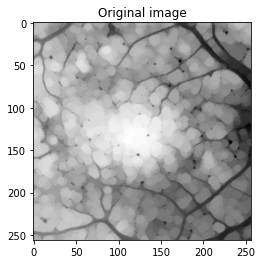

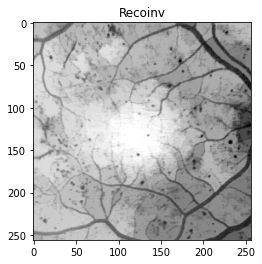

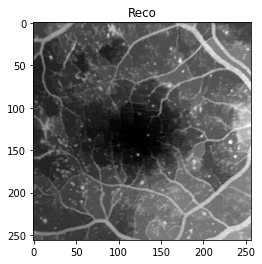

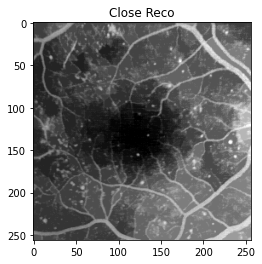

In [76]:
im=skio.imread('images/retina2.gif')
plt.imshow(im,cmap="gray")
plt.title('Original image')
plt.show()

iminv=inv(im)
plt.imshow(iminv,cmap="gray")
plt.title('Inverse image')
plt.show()

se = strel('disk',4);
open = morpho.opening(iminv,se)
plt.imshow(open,cmap="gray")
plt.title('Original image')
plt.show()

recoinv=morpho.reconstruction(open,iminv)
plt.imshow(recoinv,cmap="gray")
plt.title('Recoinv')
plt.show()

reco=inv(recoinv)
plt.imshow(reco,cmap="gray")
plt.title('Reco')
plt.show()

clos=morpho.closing(im,se)
closreco=morpho.reconstruction(clos,im,'erosion')
plt.imshow(closreco,cmap="gray")
plt.title('Close Reco')
plt.show()


**Question**

* 3) Add a reconstruction operation at each step of the alternate sequential filter (reconstruction
by dilation after each opening and reconstruction by erosion after each closing). Comment the results.

**Answer** 

* 3)The image is still recognisable, but much of the detail has been lost, it is smoothed and has less details. 
  The result is consistent with the procedure applied, we are continuing to eliminate and try to reconstruct information, losing some at each iteration, it is reasonable to think that at some point the information lost is such that the object is no longer recognisable. 

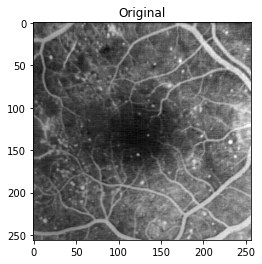

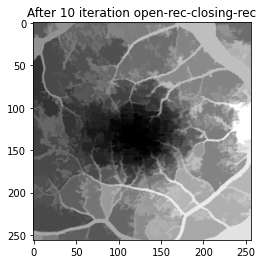

In [77]:
im=skio.imread('images/retina2.gif')

im1=im.copy()
N=10
for i in range(N):
  se=strel('disk',i)
  open=morpho.opening(im1,se)
  recop=morpho.reconstruction(open,im1)
  clos=morpho.closing(recop,se)
  im1=morpho.reconstruction(clos,recop,'erosion')

plt.imshow(im,cmap="gray")
plt.title('Original')
plt.show()
plt.imshow(im1,cmap="gray")
plt.title('After 10 iteration open-rec-closing-rec')
plt.show()


# **Segmentation**

**Question**

* 1) Compute the morphological gradient (dilation - erosion with an elementary structuring
element, of size 1), for instance on image bat200.bmp. Comment the results.

**Answer**

* 1) As a gradient it's used to enhance variations, If noise is present, the image should be filtered before applying a gradient operator so as to avoid
enhancing the noise component. We can notice that this gradientt highlights sharp gray level transitions of pixel intensity in a neighborhood
determined by a SE. Since morphological gradients are obtained using
symmetrical structuring elements, it tend to depend less on edge directionality (such as Sobel gradient for example).

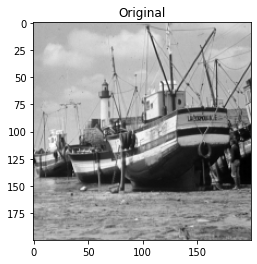

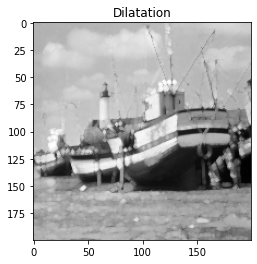

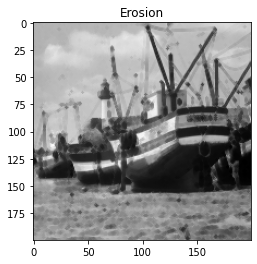

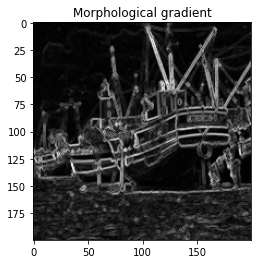

In [78]:
im=skio.imread("images/bat200.bmp")
se = strel("disk",1)
plt.imshow(im,cmap="gray")
plt.title('Original')
plt.show()

se = strel("disk",1)
dil=morpho.dilation(im,se)
plt.imshow(dil,cmap="gray")
plt.title('Dilatation')
plt.show()

ero=morpho.erosion(im,se)
plt.imshow(ero,cmap="gray")
plt.title('Erosion')
plt.show()

grad = dil - ero
plt.imshow(grad,cmap="gray")
plt.title("Morphological gradient")
plt.show()

**Question**

* 2) Compute the watershed on this gradient image (see the corresponding section in the code).
Comment the results. For the visualization, the watershed lines (having value 0 in the
result) can be superimposed on the original image.

**Answer**

* 2) The segmentation is not perfect, many omegeneuse area were considered as different areas. We can see the minimum superimposed in white in the original image. 

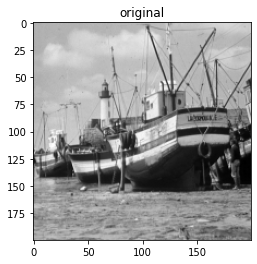

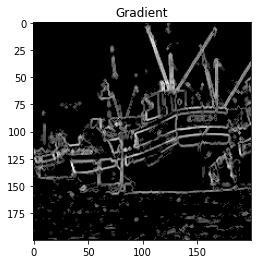

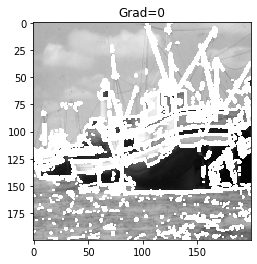

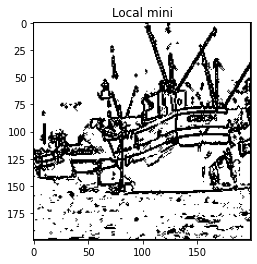

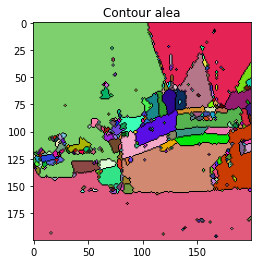

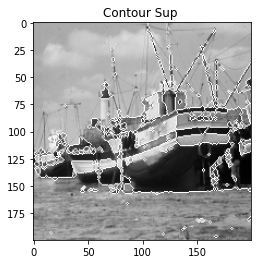

In [79]:
import numpy.ma as ma
import cv2 as cv2
im=skio.imread('images/bat200.bmp')
se=morpho.selem.disk(1)
plt.imshow(im,cmap='gray')
plt.title('original')
plt.show()

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
plt.imshow(grad,cmap="gray")
plt.title('Gradient')
plt.show()

mask = ma.masked_where(grad==0, grad)
applied_mask = ma.masked_array(im,mask)
plt.imshow(applied_mask, cmap='gray')
plt.title('Grad=0')
plt.show()


local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...
                            indices=False)
markers = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")
plt.title('Local mini')
plt.show()

labels = morpho.watershed(grad, markers,watershed_line=True)
plt.imshow(couleurs_alea(labels))
plt.title('Contour alea')
plt.show()
# viewimage_color(couleurs_alea(labels)) - Utilisable si gimp est installé

# visualization of the result
segm=labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i,j] == 0:
            segm[i,j]=255
        else:
            segm[i,j]=0
#superimposition of segmentation contours on the original image
contourSup=np.maximum(segm,im)
plt.imshow(contourSup,cmap="gray")
plt.title('Contour Sup ')
plt.show()


 **Question**

* 3) Try to improve the result by filtering the original image by an appropriate morphological
filter and/or by filtering the gradient image by a closing, before computing the watersheds.

**Answer**

* 3) As we saw during the lecture, adding a closing before computing the watersheds make the final result more precise, since closing remove small dark spots and connect small bright cracks. This way the gradient is more similar to the real edge of the object, and the watersheds works better. 


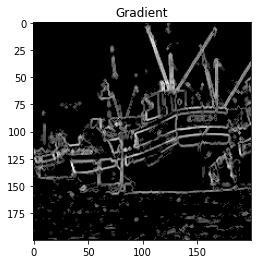

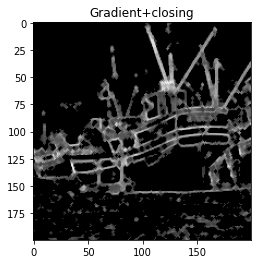

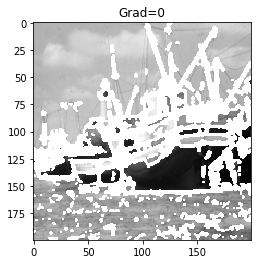

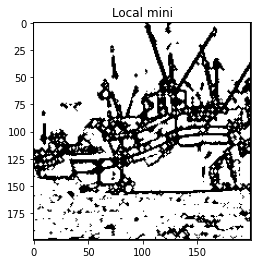

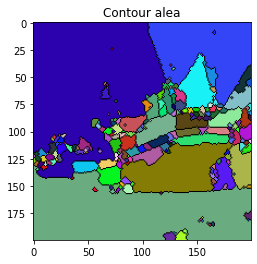

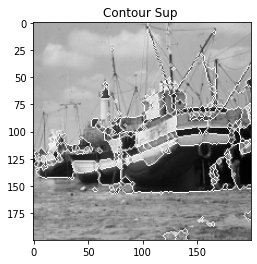

In [80]:
im=skio.imread('images/bat200.bmp')
se=morpho.selem.disk(1)

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
plt.imshow(grad,cmap="gray")
plt.title('Gradient')
plt.show()
grad=morpho.closing(grad,se)
plt.imshow(grad,cmap="gray")
plt.title('Gradient+closing')
plt.show()

mask = ma.masked_where(grad==0, grad)
applied_mask = ma.masked_array(im,mask)
plt.imshow(applied_mask, cmap='gray')
plt.title('Grad=0')
plt.show()

local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...
                            indices=False)
markers = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")
plt.title('Local mini')
plt.show()

labels = morpho.watershed(grad, markers,watershed_line=True)
plt.imshow(couleurs_alea(labels))
plt.title('Contour alea')
plt.show()
# viewimage_color(couleurs_alea(labels)) - Utilisable si gimp est installé

# visualization of the result
segm=labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i,j] == 0:
            segm[i,j]=255
        else:
            segm[i,j]=0
#superimposition of segmentation contours on the original image
contourSup=np.maximum(segm,im)
plt.imshow(contourSup,cmap="gray")
plt.title('Contour Sup ')
plt.show()


**Question**

* 4) Eliminate regional minima with a dynamic less that some value before applying the watershed. Explain the sequence of operations and comment the results.

**Answer**

* 4) What i should have done is: 

1.   Opening by reconstruction - to remove specks in the dark background
2.   A reconstruction
3.   Creating an acomplemetari image of the reconstruct one 
4.   Opening by reconstruction the inverse image - to homogenize the pixels in the foreground
5.   Do anoter reconstruction 
6.   Calculate the minima in the final image 



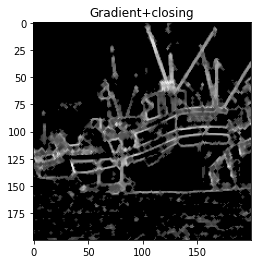

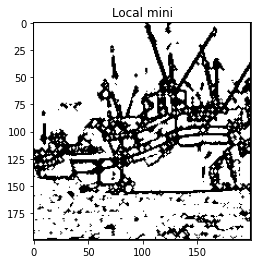

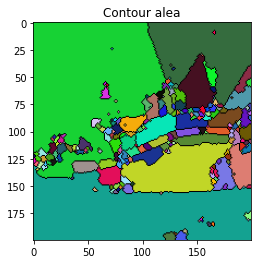

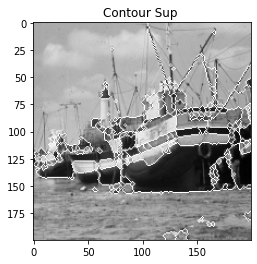

In [81]:
from skimage.morphology import local_minima
im=skio.imread('images/bat200.bmp')
se=morpho.selem.disk(1)

minima=local_minima(im)
plt.imshow(minima,cmap="gray")
plt.title('local minima')
#plt.show()
im=im-minima

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
grad=morpho.closing(grad,se)
plt.imshow(grad,cmap="gray")
plt.title('Gradient+closing')
plt.show()

local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...
                            indices=False)
markers = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")
plt.title('Local mini')
plt.show()

labels = morpho.watershed(grad, markers,watershed_line=True)
plt.imshow(couleurs_alea(labels))
plt.title('Contour alea')
plt.show()
# viewimage_color(couleurs_alea(labels)) - Utilisable si gimp est installé

# visualization of the result
segm=labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i,j] == 0:
            segm[i,j]=255
        else:
            segm[i,j]=0
#superimposition of segmentation contours on the original image
contourSup=np.maximum(segm,im)
plt.imshow(contourSup,cmap="gray")
plt.title('Contour Sup ')
plt.show()

**Question**

* 5) Define markers (manually or using a dedicated pre-processing), inside the object to be
segmented, and outside of it (e.g. on the image border). Let m be the marker, such that m
takes value 0 in the marked regions and 255 elsewhere. Compute I 0 = I ∧ m, where I is the
image on which we want to compute the watershed (e.g. gradient, or the inverted image
in the case of laiton.bmp, etc.). Reconstruct I 0 by erosion from m. The reconstructed
image should have minima only in the regions defined by m. Compute the watersheds of
the reconstructed image. Comment the results

**Answer**

* 5) Different markers were created for this point, they are commented in the code. 
The results are good, but not perfect. 
In one of the markers i tryed to take also the the lighthouse in the background, but it is completely eliminated in the image, so the marker is useless.
We can see that the rest of the markers do their job, but in the rest of the areas, especially the smaller ones, the results are not satisfactory.  

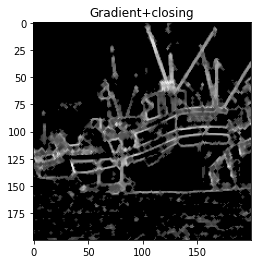

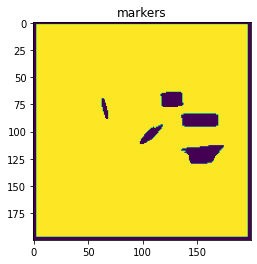

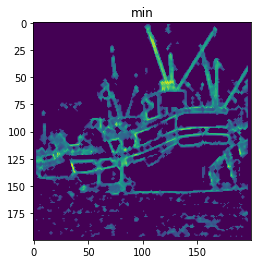

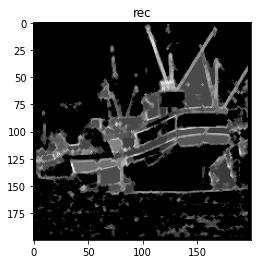

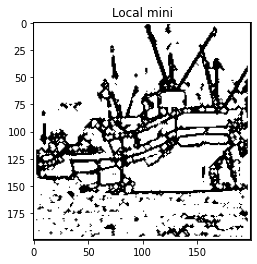

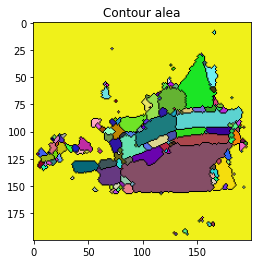

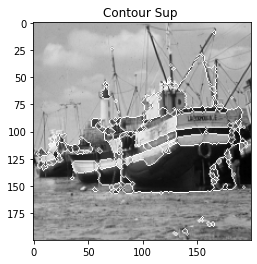

In [82]:
from skimage.morphology import disk 
from skimage.segmentation import watershed
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte

from skimage.morphology import local_minima
im=skio.imread('images/bat200.bmp')
se=morpho.selem.disk(1)

minima=local_minima(im)
plt.imshow(minima,cmap="gray")
plt.title('local minima')
#plt.show()
im=im-minima

#markers=skio.imread('images/bat200.marker.bmp')
markers=skio.imread('images/bat200.marker2.bmp')

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
grad=morpho.closing(grad,se)
plt.imshow(grad,cmap="gray")
plt.title('Gradient+closing')
plt.show()

markers=markers<100
markers= np.where(markers==True,0,255)
plt.imshow(markers)
plt.title('markers')
plt.show()

min=np.zeros((grad.shape))
for i in range(min.shape[0]):
  for j in range(min.shape[1]):
    min[i,j]=np.min([markers[i,j],grad[i,j]])
plt.imshow(min)
plt.title('min')
plt.show()

rec=morpho.reconstruction(markers,min,'erosion')
plt.imshow(rec,cmap='gray')
plt.title('rec')
plt.show()

local_mini = skf.peak_local_max(255-rec, #il n'y a pas de fonction local_min...
                            indices=False)
markers1 = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")
plt.title('Local mini')
plt.show()

labels = morpho.watershed(grad, markers1,watershed_line=True)
plt.imshow(couleurs_alea(labels))
plt.title('Contour alea')
plt.show()
# viewimage_color(couleurs_alea(labels)) - Utilisable si gimp est installé

# visualization of the result
segm=labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i,j] == 0:
            segm[i,j]=255
        else:
            segm[i,j]=0
#superimposition of segmentation contours on the original image
contourSup=np.maximum(segm,im)
plt.imshow(contourSup,cmap="gray")
plt.title('Contour Sup ')
plt.show()

(I wanted to try the watershed with a manually definition of the markers, but i don't understand why is on colab I can't even select the point on the image in an interactive way) 

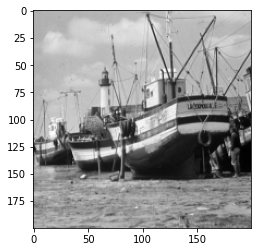

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im=skio.imread('images/bat200.bmp')
ax = plt.gca()
fig = plt.gcf()
implot = ax.imshow(im,cmap='gray')

count = 0
coordinates = []
def onclick(event):
    global count, coordinates, coordinates, im
    if event.xdata != None and event.ydata != None:
        print(event.xdata, event.ydata)
        count+=1
        coordinates.append((int(event.xdata), int(event.ydata)))

        if count==10:
            marqueurs = np.ones((im.shape))*255
            marqueurs[tuple(np.transpose(coordinates))] = 0
            intersect = morpho.erosion(im, marqueurs)
            plt.imshow(intersect, cmap="gray")
            plt.show()

cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

**Question**

* 6) How could the watersheds be used to segment the black lines in image bulles.bmp or
laiton.bmp? Discuss the different steps of the method you propose.

**Answer**

* 6) As we saw in a previous exercise we can apply different opening with as a structuring element different lines with different inclinations, and at the end calculate the point-wise maximum of the results. 
This is what I have done, in this way the road is highlighted with respect to the background. 
Afer that i applyed a thresholding, calculation of the minima and the  watersheds alghoritm, the result is not bad: almost all the rodes are of the same color, so they are  segmented as an unique object(changin the threshold more or less object are considered as the same road). 

  Another way to do it is to create some specific markers for the road, and use the same code as in the example before. 
  I think that the first method is more general if we are working with rodes or rivers, if we are working with other images, the second method is better. 

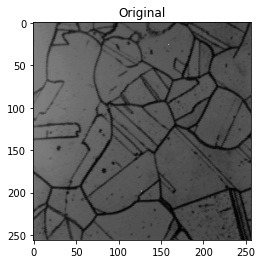

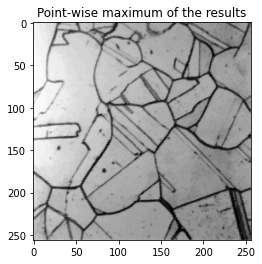

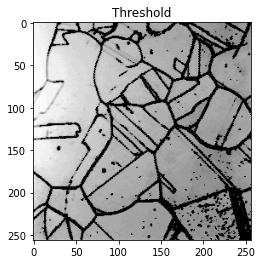

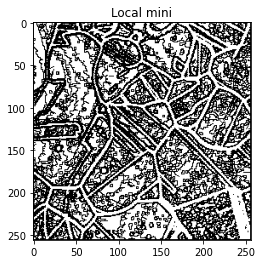

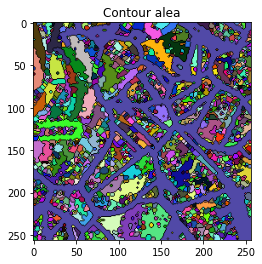

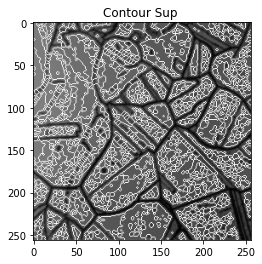

In [84]:
im=skio.imread('images/laiton.bmp')
plt.imshow(im,cmap="gray")
plt.title('Original')
plt.show()

se=strel('line',5,30)
se1=strel('line',5,60)
se2=strel('line',5,90)
se3=strel('line',5,120)
se4=strel('line',5,150)
se5=strel('line',5,180)
se6=strel('line',5,210)
se7=strel('line',5,240)
se8=strel('line',5,270)

#opening
open=morpho.opening(im,se)
plt.imshow(open,cmap="gray")
open1=morpho.opening(im,se1)
plt.imshow(open1,cmap="gray")
open2=morpho.opening(im,se2)
plt.imshow(open2,cmap="gray")
open3=morpho.opening(im,se3)
plt.imshow(open3,cmap="gray")
open4=morpho.opening(im,se4)
plt.imshow(open4,cmap="gray")
open5=morpho.opening(im,se5)
plt.imshow(open5,cmap="gray")
open6=morpho.opening(im,se6)
plt.imshow(open6,cmap="gray")
open7=morpho.opening(im,se7)
plt.imshow(open7,cmap="gray")
open8=morpho.opening(im,se8)
plt.imshow(open8,cmap="gray")

max=np.maximum(open,open1)
max=np.maximum(max,open2)
max=np.maximum(max,open3)
max=np.maximum(max,open4)
max=np.maximum(max,open5)
max=np.maximum(max,open6)
max=np.maximum(max,open7)
max=np.maximum(max,open8)
plt.imshow(max,cmap="gray")
plt.title('Point-wise maximum of the results')
plt.show()

thresh = 65
indices = im < thresh
max[indices] = 0
plt.imshow(max, cmap="gray")
plt.title('Threshold')
plt.show()

grad=max
local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...
                            indices=False)
markers = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")
plt.title('Local mini')
plt.show()

labels = morpho.watershed(grad, markers,watershed_line=True)
plt.imshow(couleurs_alea(labels))
plt.title('Contour alea')
plt.show()
# viewimage_color(couleurs_alea(labels)) - Utilisable si gimp est installé

# visualization of the result
segm=labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i,j] == 0:
            segm[i,j]=255
        else:
            segm[i,j]=0
#superimposition of segmentation contours on the original image
contourSup=np.maximum(segm,im)
plt.imshow(contourSup,cmap="gray")
plt.title('Contour Sup ')
plt.show()